<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/Time%20Series/stock_algo_trading_CCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# !pip yfinance
import yfinance as yf

# !pip install ta
from ta import * # like any other bad programemr would do... 
import ta 

In [2]:
share = 'spy'

dataset = yf.download(share, start="2008-11-11") #, start="2017-01-01"
dataset = dataset.drop(columns=['Adj Close','Volume'])
dataset['MA'] = dataset.Close.rolling(window=5).mean()
dataset.dropna(inplace=True)
dataset.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,MA
Date,,,,,
2008-11-17,86.379997,88.559998,85.160004,85.470001,87.770000
2008-11-18,85.150002,87.220001,82.910004,87.080002,87.232001
2008-11-19,85.910004,86.870003,80.919998,81.500000,86.368001
2008-11-20,80.129997,82.510002,75.050003,75.449997,83.224001
2008-11-21,77.459999,80.900002,74.339996,79.519997,81.803999
2008-11-24,81.919998,86.989998,80.360001,85.029999,81.715999
2008-11-25,87.300003,87.510002,83.820000,85.660004,81.431999
2008-11-26,84.300003,89.190002,84.239998,88.970001,82.925999
2008-11-28,88.629997,90.129997,88.480003,90.089996,85.853999


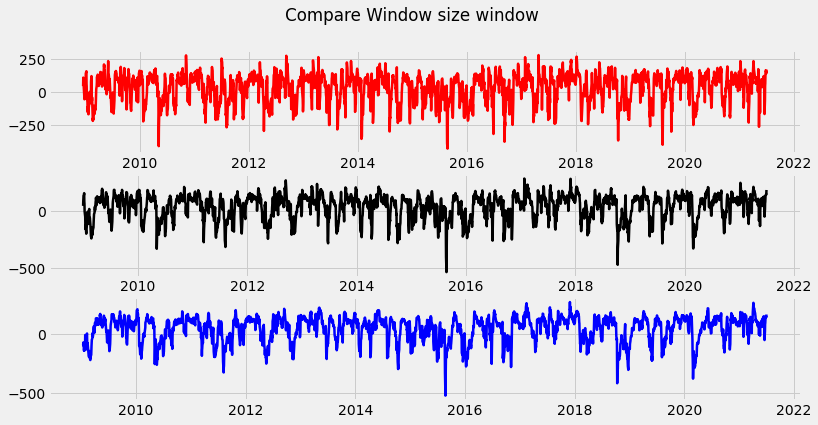

In [3]:
C =0.015#0.015
cci2 = ta.trend.cci(high=dataset.High, low=dataset.Low, close=dataset.Close, window=20, constant=C, fillna=False) # 'n' is now 'window'; 'c' is not 'constant'... damn API changes. current version on ta broke several notebooks. This is why I rerun past code every few years 
cci3 = ta.trend.cci(high=dataset.High, low=dataset.Low, close=dataset.Close, window=30, constant=C, fillna=False)
cci4 = ta.trend.cci(high=dataset.High, low=dataset.Low, close=dataset.Close, window=40, constant=C, fillna=False)


fig, axs = plt.subplots(3, figsize=(12,6))
fig.suptitle('Compare Window size window')
# fig.set_figheight(15)
# fig.set_figwidth(15)

axs[0].plot(cci2, color='r', linewidth=2.5) #, alpha = 1.0)
# axs[0].plot(cci4, color='b', linewidth=2.5) #, alpha = 0.85)

axs[1].plot(cci3, color='k', linewidth=2.5) #, alpha = 1.0)
axs[2].plot(cci4, color='b', linewidth=2.5) #, alpha = 0.85)
plt.show()

## the *light blue* is when the [b]lue does not cover the blac[k]

In [7]:
dataset["cci"] = cci4
dataset.head(5)

,Open,High,Low,Close,MA,cci
Date,,,,,,
2008-11-17,86.379997,88.559998,85.160004,85.470001,87.770000,NaN
2008-11-18,85.150002,87.220001,82.910004,87.080002,87.232001,NaN
2008-11-19,85.910004,86.870003,80.919998,81.500000,86.368001,NaN
2008-11-20,80.129997,82.510002,75.050003,75.449997,83.224001,NaN
2008-11-21,77.459999,80.900002,74.339996,79.519997,81.803999,NaN


## Plot days in which the CCI is > N

In [136]:
print(dataset['Close'].shape)
print(dataset['day_in_market'].shape)

(3177,)
(3177,)


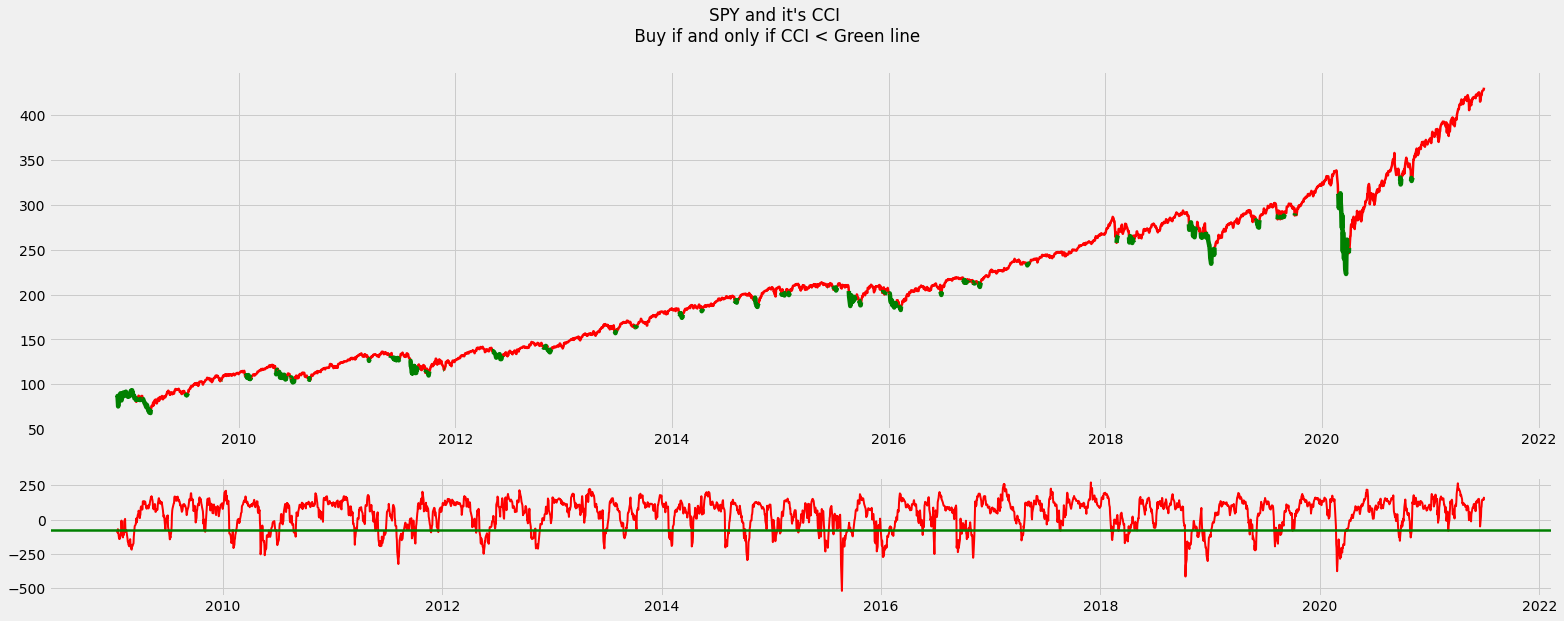

In [177]:
def plot_stock_cci_over_under(lowerBound=-100, upperBound=100, dataset=dataset):
    tmp = dataset[(dataset['cci'] > lowerBound) & (dataset['cci'] < upperBound)]
    a = set(dataset.index.values)
    b = set(tmp.index.values)
    idx_in_market = list(a-b)
    
    dataset['day_in_market'] = dataset.loc[idx_in_market].sort_index()['Close']
    
#     dataset[['Close', 'day_in_market']].plot(figsize=(18, 6), title='You only buy more stock on the blue days. Never sell')
    
    
    fig, axs = plt.subplots(2, gridspec_kw={'height_ratios': [3, 1]}) # , figsize=(24, 9)
    fig.suptitle(f"{share.upper()} and it's CCI\n Buy if and only if CCI < Green line")
    fig.set_figheight(9)
    fig.set_figwidth(24)
    axs[0].plot(dataset['Close'], color='red', linewidth=2.5, label='price') #, alpha = 1.0)
    axs[0].plot(dataset['day_in_market'], color='green', linewidth=4.5, label='day_in_market') #, alpha = 1.0)
#     axs[1].axhline(upperBound, linewidth=2.5)
    axs[1].plot(dataset['cci'], color='red', linewidth=2.0, label='cci') #, alpha = 1.0)
    axs[1].axhline(lowerBound, linewidth=2.5, color="green")


#     plt.legend()
#     fig.show()

plot_stock_cci_over_under(-75, 999999)

## Buy and Hold

In [41]:
def noStrat():
    df2 = dataset.iloc[0::20] #[1::20] start at 1, every 20th (monthly)
    
    total =0
    shares=0 
    invPerMonth = 1000
    total_invested=invPerMonth
    moneyToInvest = invPerMonth
    
    for i in df2.index:
      Close = df2.loc[i].at['Close']

      numShares = math.floor((moneyToInvest)/Close.round(2))
      shares+=numShares
      moneyToInvest -= (Close.round(2) * numShares)

      moneyToInvest += invPerMonth
      total_invested += invPerMonth

    resultOfNoStrat = int(df2.tail(1).Close.round(2)*shares+moneyToInvest)
#     print("moneyToInvest: ", moneyToInvest)
    #print("num of shares" , shares)
    #print("num of shares * last closing ",int(dataset.tail(1).Close*shares)) #dataset.tail, not df2.tail
    #print("total: ", (int(dataset.tail(1).Close*shares)+invPerMonth))
    print(f'Buy and hold would yeild {resultOfNoStrat:.2f}, with a total of {total_invested:.2f} invested')
    return resultOfNoStrat

resultOfNoStrat = noStrat()

Buy and hold would yeild 387653.00, with a total of 160000.00 invested


## Double for loop pram optimization

In [98]:
def CCIStrat(dataset=dataset):
  df2 = dataset.iloc[0::20] #[1::20] start at 1, every 20th (monthly)
  
  
  top_total=0
  top_min=0
  top_max=0
  shares=0 
  moneyToInvest=0 # not invPerMonth here
  
 
  step_size = 10
  cci_min = int(df2['cci'].min())
  cci_max = int(df2['cci'].min())+step_size
  for max in np.arange(-200+step_size, 200, step_size):
    print(f'\nmax is {max}')
    
  
    for min in np.arange(-200, max-step_size, step_size):
        print(f'  min is {min}', end='')
        

        total =0
        shares=0 
        invPerMonth = 1000
        moneyToInvest = invPerMonth
        for i in df2.index:
            Cci = df2.loc[i].at['cci']
            Close = df2.loc[i].at['Close']

            if(Cci > max):
                #sell
                moneyToInvest += (Close.round(2) * shares)
                shares=0

            if(Cci< min): # or np.isnan(Cci) # prevents exactly "buy and hold" as for the first 40 days (2 iterations) cci is NaN
                #buy 
                numShares = math.floor((moneyToInvest)/Close.round(2))
                shares+=numShares
                moneyToInvest -= (Close.round(2) * numShares)

            moneyToInvest += invPerMonth
            #end of innerloop 
        
        total = int(df2.tail(1).Close.round(2)*shares+moneyToInvest)
        if(total >top_total):
            top_total = total
            top_min   = min
            top_max   = max 
    #       print("   min: {}\n   max: {}\n   total: {}".format(min,max,total))
  #print("moneyToInvest: ",moneyToInvest)
  #print("num of shares" , shares)
  #print("num of shares * last closing ",int(dataset.tail(1).Close*shares)) #dataset.tail, not df2.tail
  #print("total: ", (int(dataset.tail(1).Close*shares)+moneyToInvest))
  print("=======================================")
  print("   min: {}\n   max: {}\n   total: {}".format(top_min,top_max,top_total))
  print(f"   resultOfNoStrat: {resultOfNoStrat:.2f}")
#   return int(dataset.tail(1).Close*shares+moneyToInvest)

resultOfCCStrat = CCIStrat()


max is -190

max is -180
  min is -200
max is -170
  min is -200  min is -190
max is -160
  min is -200  min is -190  min is -180
max is -150
  min is -200  min is -190  min is -180  min is -170
max is -140
  min is -200  min is -190  min is -180  min is -170  min is -160
max is -130
  min is -200  min is -190  min is -180  min is -170  min is -160  min is -150
max is -120
  min is -200  min is -190  min is -180  min is -170  min is -160  min is -150  min is -140
max is -110
  min is -200  min is -190  min is -180  min is -170  min is -160  min is -150  min is -140  min is -130
max is -100
  min is -200  min is -190  min is -180  min is -170  min is -160  min is -150  min is -140  min is -130  min is -120
max is -90
  min is -200  min is -190  min is -180  min is -170  min is -160  min is -150  min is -140  min is -130  min is -120  min is -110
max is -80
  min is -200  min is -190  min is -180  min is -170  min is -160  min is -150  min is -140  min is -130  min is -120  min is -110 

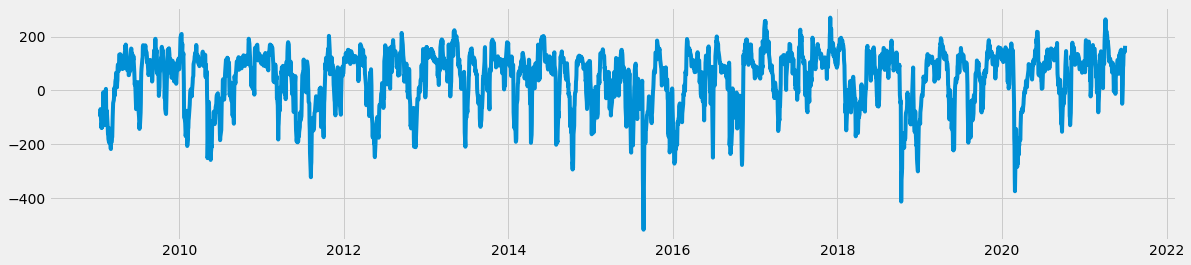

In [180]:
fig=plt.figure(figsize=(18,4))
plt.plot(dataset.cci)
plt.show()

# TODO add pics below

     [Where selling is not permitted]
CCI to buy -30
Total money made: 385382
What if we did buy and hold?, 387653.00	 That's a -0.005858% change

     [Where selling is not permitted]
CCI to buy 0
Total money made: 383640
What if we did buy and hold?, 387653.00	 That's a -0.010352% change

     [Where selling is not permitted]
CCI to buy -75
Total money made: 388840
What if we did buy and hold?, 387653.00	 That's a 0.003062% change

     [Where selling is not permitted]
CCI to buy -150
Total money made: 388453
What if we did buy and hold?, 387653.00	 That's a 0.002064% change



c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


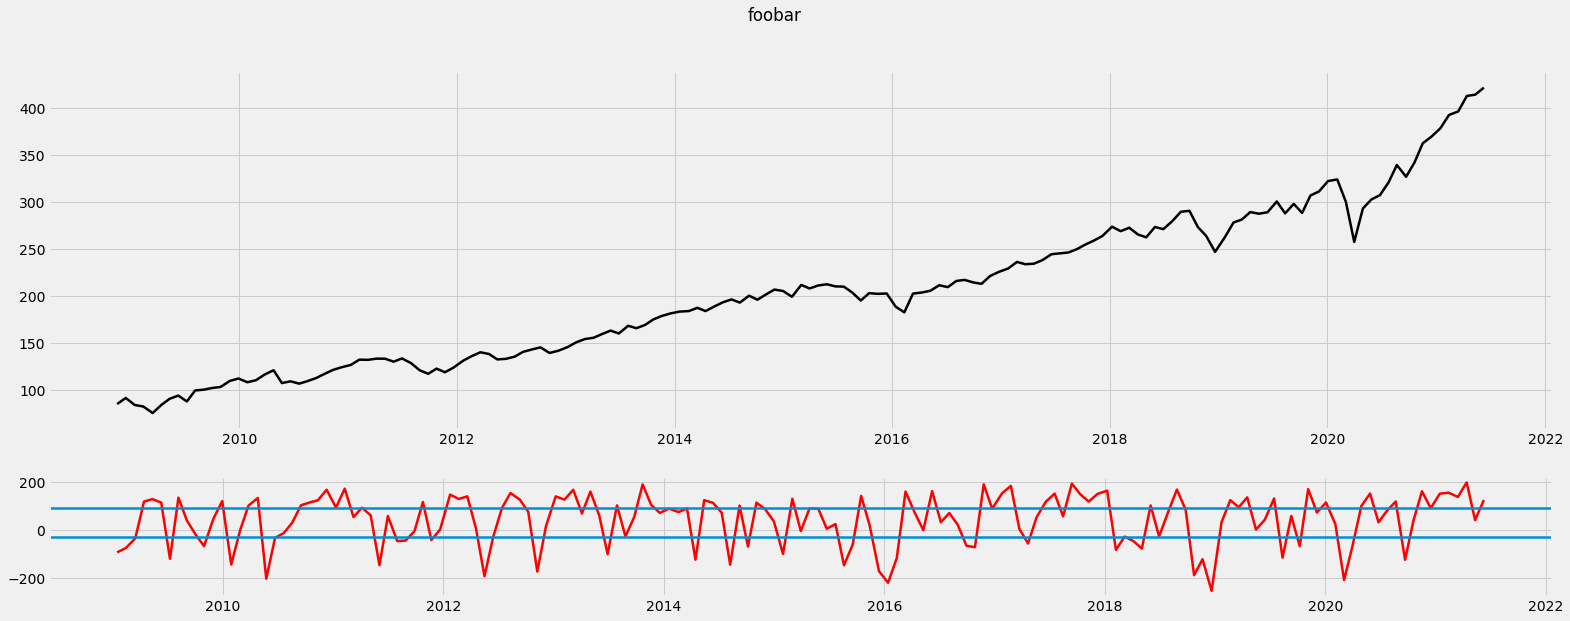

In [179]:
def test(upper = 100, lower = -100, allow_sell=True, plot=False):
        
    df2 = dataset.iloc[0::20]
    total =0
    shares=0 
    invPerMonth = 1000
    moneyToInvest = invPerMonth
    for i in df2.index:
        Cci = df2.loc[i].at['cci']
        Close = df2.loc[i].at['Close']

        if(Cci > upper and allow_sell):
#             #sell
            moneyToInvest += (Close.round(2) * shares)
            shares=0
            print('sold')


        if(Cci > lower): # or np.isnan(Cci) # prevents exactly "buy and hold" as for the first 40 days (2 iterations) cci is NaN
            #buy 
            numShares = math.floor((moneyToInvest)/Close.round(2))
            shares+=numShares
            moneyToInvest -= (Close.round(2) * numShares)

        moneyToInvest += invPerMonth
    #end of innerloop 
    total = int(df2.tail(1).Close.round(2)*shares + moneyToInvest)

    if allow_sell==False:
        print(f'     [Where selling is not permitted]')
        print("CCI to buy {}\nTotal money made: {}".format(lower, total))
    else:
        print("CCI to buy {}\nCCI to sell {}\nTotal money made: {}".format(lower, upper, total))
    print(f"What if we did buy and hold?, {resultOfNoStrat:.2f}\t That's a {(total-resultOfNoStrat)/resultOfNoStrat:.6f}% change")

    print(f"")
    
    if plot:
        fig, axs = plt.subplots(2, gridspec_kw={'height_ratios': [3, 1]}) # , figsize=(24, 9)
        fig.suptitle('foobar')
        fig.set_figheight(9)
        fig.set_figwidth(24)
        axs[0].plot(df2['Close'], color='k', linewidth=2.5) #, alpha = 1.0)
        axs[1].plot(df2['cci'], color='r', linewidth=2.5) #, alpha = 1.0)
        axs[1].axhline(lower, linewidth=2.5)
        axs[1].axhline(upper, linewidth=2.5)
        fig.show()

# test(upper = 100, lower = -100)
# test(upper = 110, lower = -60)
# test(upper = 90, lower = -30)
# test(upper = 90, lower = 0)

test(upper = 90, lower = -30, allow_sell=False, plot=True)

test(upper = -99999, lower = 0, allow_sell=False)
test(upper = -99999, lower = -75, allow_sell=False)
test(upper = -99999, lower = -150, allow_sell=False)

(3177, 8)


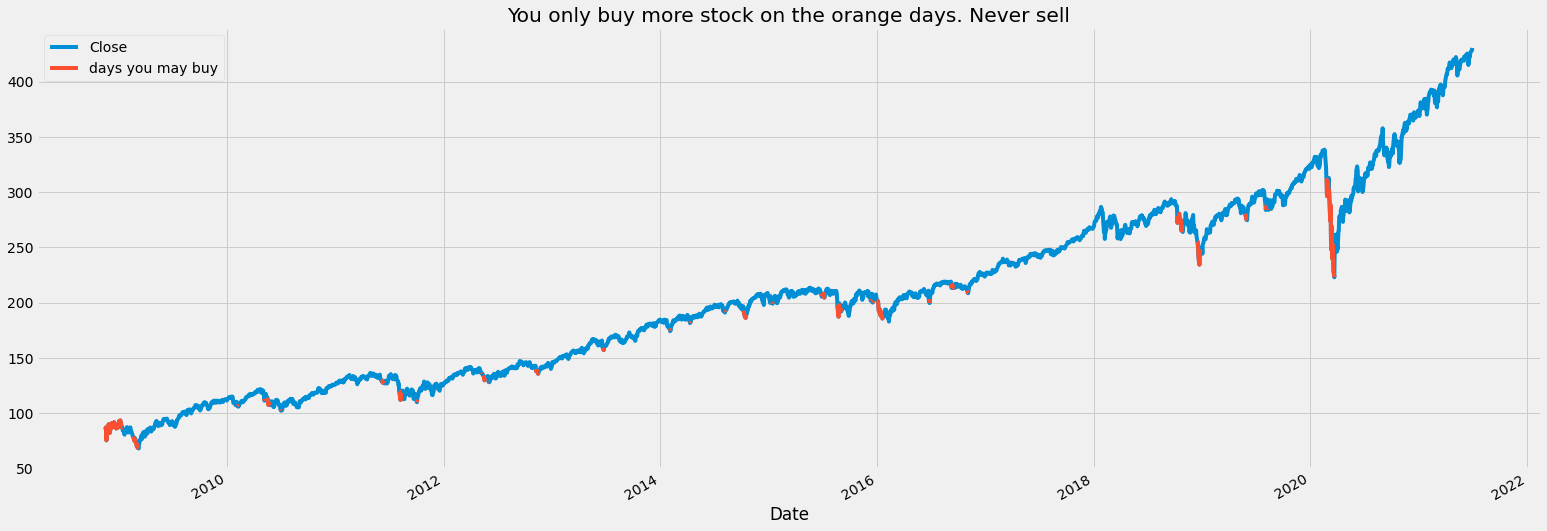

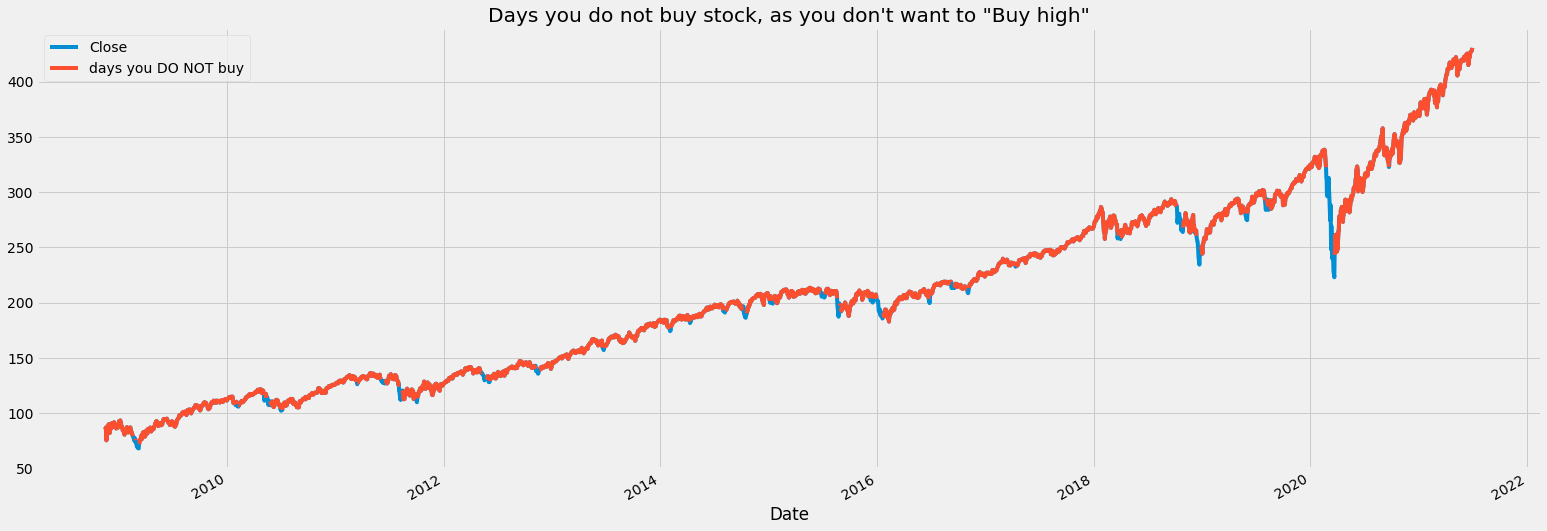

In [97]:
CCI_to_buy_below = -150
print(dataset.shape)

tmp = dataset[dataset['cci'] > CCI_to_buy_below]

a = set(dataset.index.values)
b = set(tmp.index.values)
idx_in_market = list(a-b)
dataset['days you may buy'] = dataset.loc[idx_in_market].sort_index()['Close']
dataset[['Close', 'days you may buy']].plot(figsize=(24, 9), title='You only buy more stock on the orange days. Never sell');


tmp = dataset[dataset['cci'] < CCI_to_buy_below]

a = set(dataset.index.values)
b = set(tmp.index.values)
idx_in_market = list(a-b)
dataset['days you DO NOT buy'] = dataset.loc[idx_in_market].sort_index()['Close']
dataset[['Close', 'days you DO NOT buy']].plot(figsize=(24, 9), title='Days you do not buy stock, as you don\'t want to \"Buy high\"');